In [44]:
from keras.applications import VGG16
from keras import backend as K
model=VGG16(weights='imagenet',include_top=False)

layer_name='block3_conv1'
filter_index=0

layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

grads=K.gradients(loss,model.input)[0]
model.input

            


<tf.Tensor 'input_9:0' shape=(?, ?, ?, 3) dtype=float32>

In [45]:
grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

In [46]:
iterate=K.function([model.input],[loss,grads])
import numpy as np
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])
loss_value.shape

()

In [47]:
input_img_data=np.random.random((1,150,150,3))*20+128
step=1
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data +=grads_value*step
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [48]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    
    grads=K.gradients(loss,model.input)[0]
    grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,size,size,3))*20+128
    step=1
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
    img=input_img_data[0]
    return deprocess_image(img)

In [49]:
import matplotlib.pyplot as plt
plt.imshow(generate_pattern('block3_conv1',0))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
layer_name='block4_conv1'
size=64
margin=5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


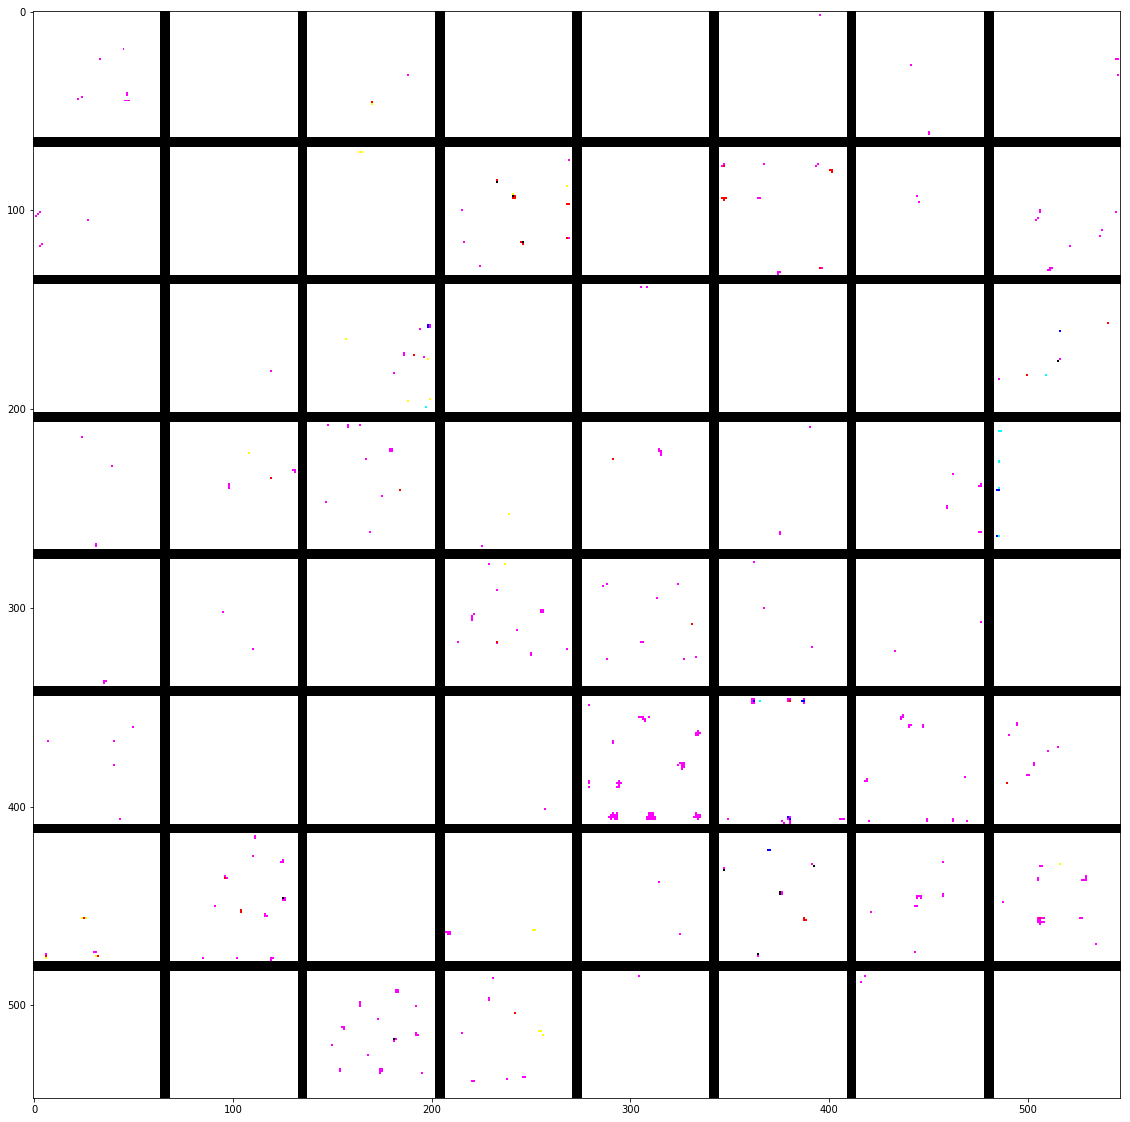

In [41]:
results=np.zeros((8*size+7*margin,8*size+7*margin,3))
for i in range(8):
    for j in range(8):
        filter_img=generate_pattern(layer_name,i+(j*8),size=size)
        horizontal_start=i*size+i*margin
        horizontal_end=horizontal_start+size
        vertical_start=j*size+j*margin
        vertical_end=vertical_start+size
        results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img
        
plt.figure(figsize=(20,20))
plt.imshow(results)
filter_img

In [50]:
filter_img

array([[[123, 117, 121],
        [127, 133, 121],
        [132, 142, 144],
        ...,
        [140, 140, 143],
        [148, 153, 145],
        [141, 136, 147]],

       [[119, 114, 113],
        [133, 135, 122],
        [141, 133, 136],
        ...,
        [157, 138, 165],
        [142, 143, 159],
        [142, 146, 149]],

       [[117, 112, 106],
        [128, 124, 125],
        [147, 142, 142],
        ...,
        [159, 131, 162],
        [139, 111, 152],
        [127, 119, 135]],

       ...,

       [[128, 136, 122],
        [135, 142, 117],
        [129, 124, 102],
        ...,
        [149, 206, 198],
        [163, 239, 212],
        [130, 185, 155]],

       [[126, 137, 120],
        [137, 155, 132],
        [128, 136, 123],
        ...,
        [159, 189, 210],
        [169, 220, 217],
        [143, 175, 161]],

       [[122, 135, 127],
        [128, 135, 130],
        [121, 124, 124],
        ...,
        [118, 123, 144],
        [130, 149, 149],
        [129, 141, 134]]